# Esperimento Di Foucault - parte 1

##Importo Le Librerie

In [3]:
import numpy as np  
from matplotlib import pyplot as plt 
from scipy.optimize import curve_fit 
from scipy import odr
from ipywidgets import interact, interact_manual, FloatSlider, Checkbox, BoundedFloatText
from google.colab import files

##Fit Lineare

### Raccolgo I Dati

In [4]:
distanza_iniziale       =     0 # m
distanza_iniziale_err   =     0.001 # m
tempo_iniziale          =     -12.78 * (10 ** -9) # s
tempo_iniziale_err      =     0.15 * (10 ** -9) # s

distanze                =     [8, 20, 92.3, 172.2, 238.9, 323.9, 382.6, 459.7, 548.7, 608.7] # cm
tempi                   =     [0.57, 1.31, 6.22, 11.5, 16, 21.7, 25.6, 30.7, 36.7, 40.7] # nanosecondi (ns)

distanze_err            =     [0.10] * len(distanze) # cm
tempi_err               =     [0.32, 0.34, 0.31, 0.3, 0.24, 0.25, 0.33, 0.27, 0.29, 0.26] # nanosecondi (ns)

10 10


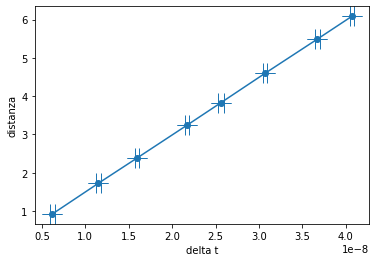

In [5]:
tempi = [i * (10 ** (-9)) for i in tempi]
distanze = [i * (10 ** (-2)) for i in distanze]
tempi_err = [i * (10 ** (-9)) for i in tempi_err]
distanze_err = [i * (10 ** (-2)) for i in distanze_err]

print(len(distanze), len(tempi))

# escludo i primi due punti perché sono meno coerenti degli altri, così avrò un risultato migliore dal fit
x = np.array(tempi)[2:]
x_err = np.array(tempi_err)[2:]
y = np.array(distanze)[2:]
y_err = np.array(distanze_err)[2:]

plt.xlabel("delta t")
plt.ylabel("distanza")
plt.errorbar(x, y, xerr = x_err, yerr = y_err, capsize=10)
_= plt.scatter(x, y)

### Eseguo Il Fit

In [6]:
#Definizione funzione di fit 
def retta(x,A,B): 
  return A*x+B

In [11]:
def fitplot(A, B, print_output=True):
 
  guess = np.array([A,B]) #array of initial guesses
  bounds = ([-np.inf,-np.inf], [np.inf,np.inf]) 

  plt.figure(figsize=(9, 6))
 
  popt, pcov = curve_fit(retta, x, y)

                                                                                                
  #plotting fit result
  plt.errorbar(x, y, xerr=x_err, yerr = y_err, capsize=5)
  plt.scatter(x,y, s=25, c = "c", label="Exp.")     #plot data points without errorbars
  plt.plot(x,retta(x,popt[0],popt[1]),color= "m" ,label="Fit",linewidth=1)
  plt.xlabel("")
  plt.ylabel("")
  plt.grid(which='both')
  plt.legend()
  plt.show()
  
  
  
  if print_output:
    label = ["c", "B"]
    for l, v, e in zip(label, popt, np.sqrt(np.diag(pcov))) :
      print("%10s = %9.6f +- %7.6f" % (l ,v * 2, e * 2))
      break

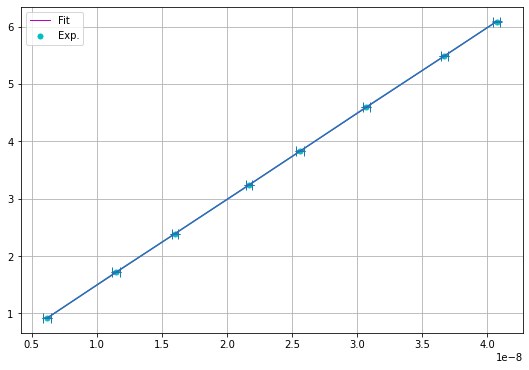

         c = 299415749.484886 +- 261845.483737


In [12]:
fitplot(0, 0)